In [ ]:
# Display the extracted boundaries to visually verify they're OK.
# For now we're simply plotting them with Matplotlib, rather than a full mapping environment.
# TODO: map it properly on a basemap, e.g. with folium

In [ ]:
# Dependencies
!pip install --upgrade geopandas

In [ ]:
import glob
import os

import geopandas as gpd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive

Data
==

In [ ]:
# Mount GDrive folder
drive.mount('/content/gdrive')

project_dir = '/content/gdrive/MyDrive/WardProfiles'
oa_dir = f"{project_dir}/boundaries/oa"
lookup_dir = f"{project_dir}/lookups/oa"

Mounted at /content/gdrive


Maps
==

OA geometries
--

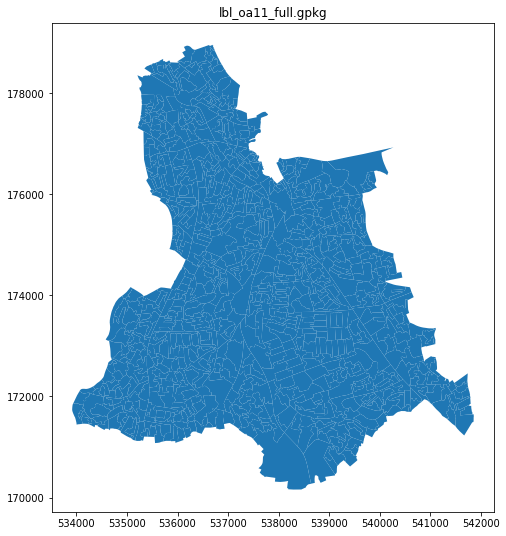

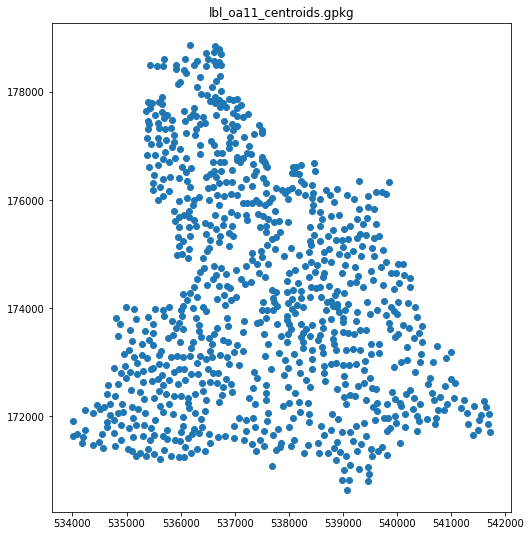

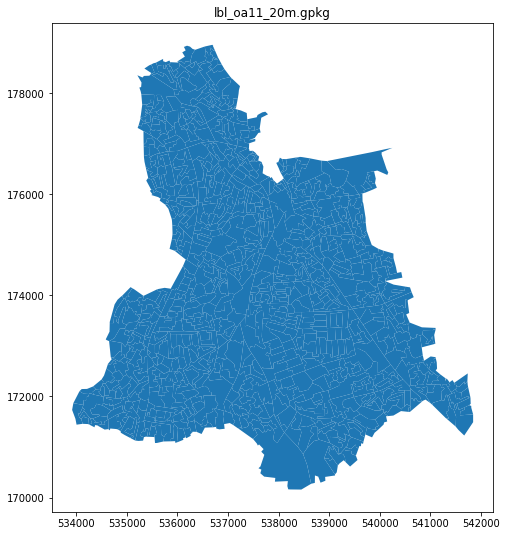

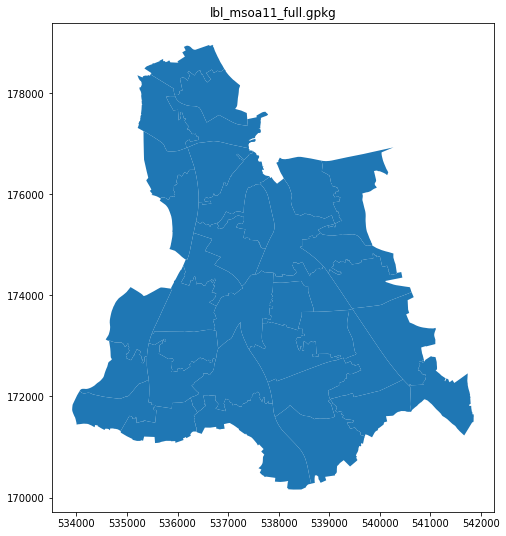

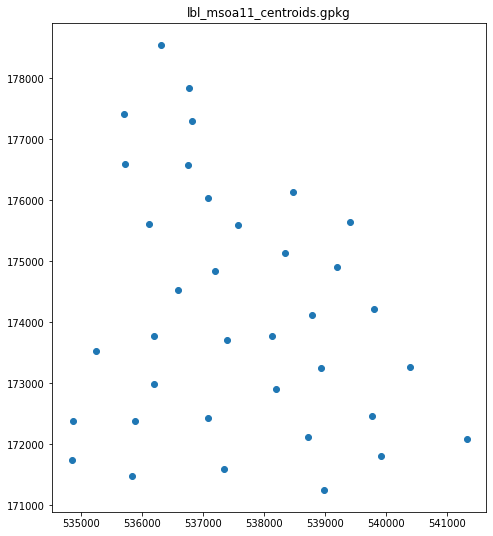

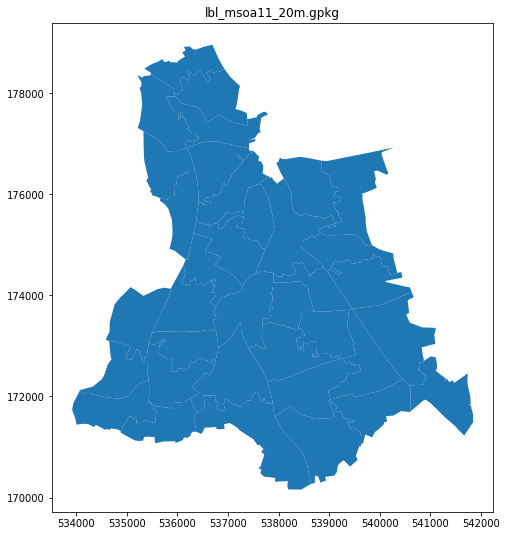

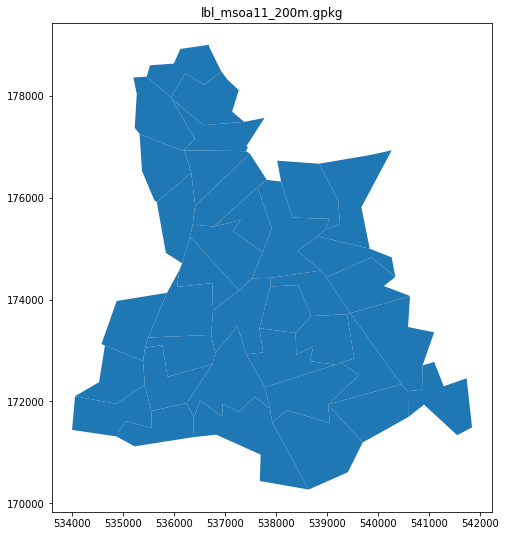

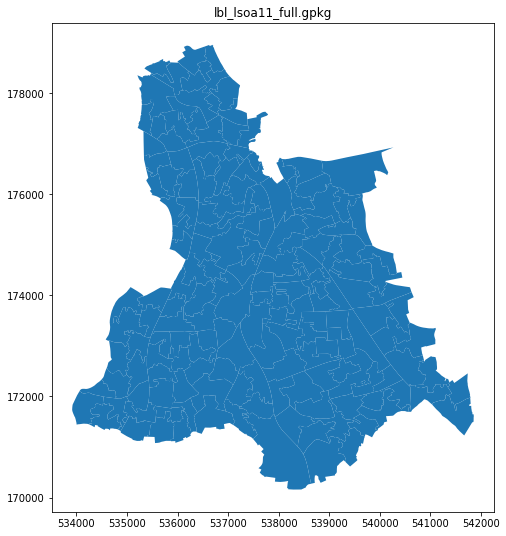

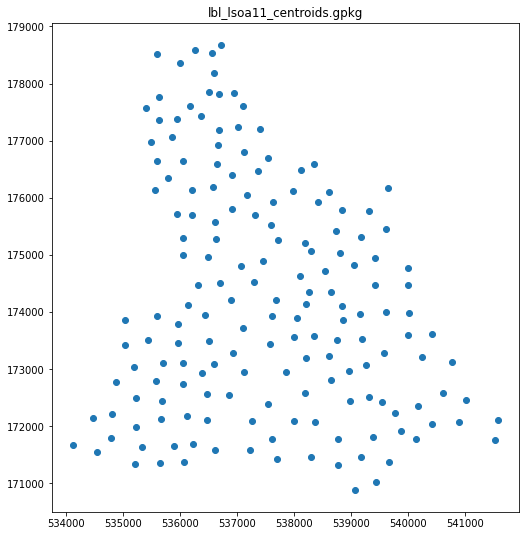

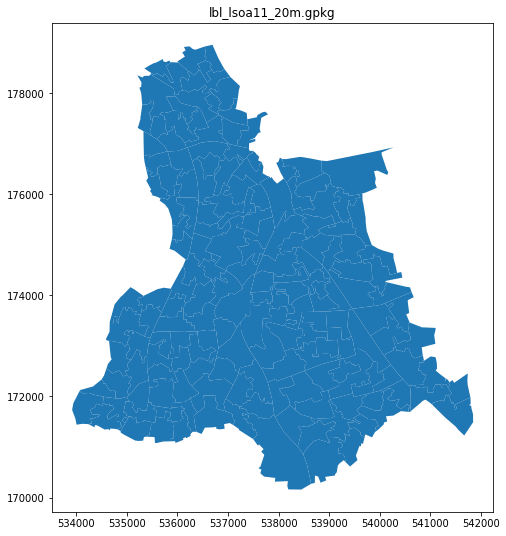

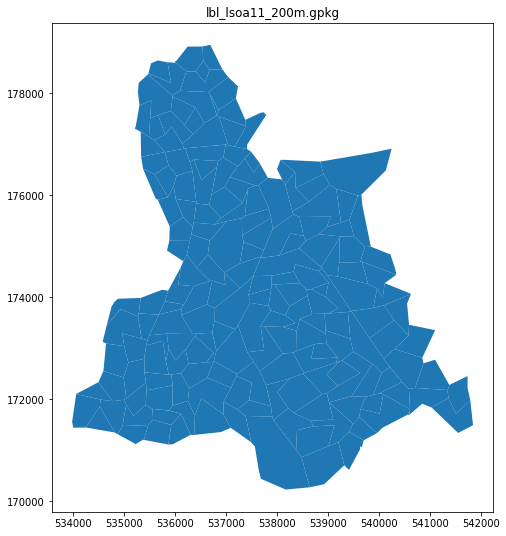

In [ ]:
for filename in sorted(glob.glob(f"{oa_dir}/lbl_*.gpkg"), reverse=True):
  d = gpd.read_file(filename)
  fig, ax = plt.subplots(1, 1, figsize=(12, 9))
  d.plot(ax=ax)
  plt.title(os.path.basename(filename))

Ward-level geometries (2020 wards)
--

In [ ]:
lbl_oa_wards = pd.read_csv(f"{lookup_dir}/lbl_oa11_wd20_lad20_202012.csv")
lbl_oa_wards.columns

Index(['FID', 'OA11CD', 'WD20CD', 'WD20NM', 'LAD20CD', 'LAD20NM'], dtype='object')

In [ ]:
oa = gpd.read_file(f"{oa_dir}/lbl_oa11_20m.gpkg")
oa.columns

Index(['OBJECTID', 'OA11CD', 'LAD11CD', 'Shape__Are', 'Shape__Len',
       'geometry'],
      dtype='object')

In [ ]:
# Join
oa_wards = oa.merge(lbl_oa_wards, on='OA11CD')
# Dissolve
wards = oa_wards.dissolve(by='WD20CD')

Text(0.5, 1.0, 'Wards derived from OA geometries')

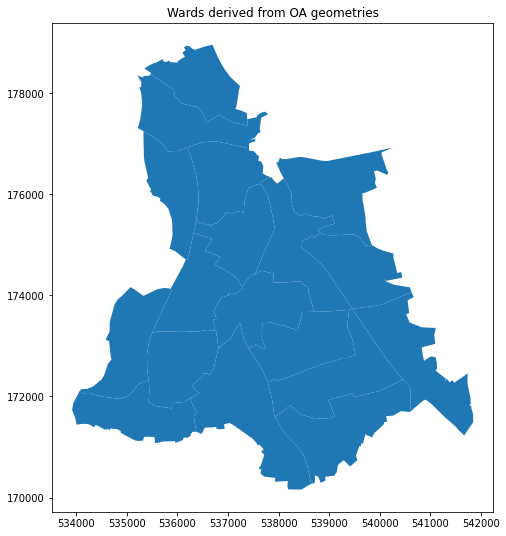

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
wards.plot(ax=ax)
plt.title("Wards derived from OA geometries")